In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

from datetime import datetime
from sqlalchemy.orm import sessionmaker 
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
Session2 = sessionmaker(bind=engine)
session = Session2()

In [9]:
for row in session.query(Measurement.station, Measurement.date).limit(5).all():
    print(row)

('USC00519397', '2010-01-01')
('USC00519397', '2010-01-02')
('USC00519397', '2010-01-03')
('USC00519397', '2010-01-04')
('USC00519397', '2010-01-06')


# Exploratory Precipitation Analysis

In [13]:
#Checking the connection with an initial query
for row in session.query(Measurement.station, func.max(Measurement.date), Measurement.prcp,Measurement.tobs):
    print(row)

('USC00519397', '2017-08-23', 0.0, 81.0)


In [14]:
#1. Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


In [15]:
#Converting the string format into date format:
last_date = last_date.date
type(last_date)

str

In [16]:
latest_date = datetime.strptime(last_date, '%Y-%m-%d')

In [17]:
#The most recent date in the dataset:
print(latest_date)

2017-08-23 00:00:00


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [19]:
# Calculate the date one year from the last date in data set.
year_ago = latest_date - relativedelta(years=1)
print(year_ago)

2016-08-23 00:00:00


In [20]:
# Perform a query to retrieve the data and precipitation scores
latest_year = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= year_ago)

for row in latest_year:
    print(row.date,row.prcp)

2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
2016-10-27 0.0
20

2017-04-17 None
2017-04-18 0.0
2017-04-19 None
2017-04-20 None
2017-04-21 None
2017-04-24 None
2017-04-25 None
2017-04-27 None
2017-04-28 None
2017-06-02 None
2017-06-05 None
2017-06-06 None
2017-06-07 None
2017-06-08 None
2017-06-09 None
2017-06-13 None
2017-06-14 None
2017-06-15 None
2017-06-16 None
2017-06-19 None
2017-06-20 None
2017-06-21 None
2017-06-22 0.0
2017-06-23 0.0
2017-06-26 None
2017-06-27 0.0
2017-06-28 0.0
2017-06-29 0.0
2017-06-30 0.12
2017-07-03 None
2017-07-05 None
2017-07-06 None
2017-07-07 None
2017-07-10 None
2017-07-11 None
2017-07-12 None
2017-07-13 None
2017-07-18 0.0
2017-07-19 0.0
2017-07-20 0.0
2017-07-21 0.0
2017-07-25 0.0
2017-07-26 None
2017-07-27 None
2017-07-28 0.01
2017-07-31 None
2016-08-24 1.22
2016-08-25 0.21
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.14
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.25
2016-09-02 None
2016-09-03 0.08
2016-09-04 0.74
2016-09-05 0.02
2016-09-06 0.03
2016-09-07 0.11
2016-09-08 0.01
2016-09-09 0.23
2016-09-10 0.14
2016-09

In [21]:
type(latest_year)

sqlalchemy.orm.query.Query

In [22]:
# Save the query results as a Pandas DataFrame 
latest_year_df = pd.read_sql_query(
    sql = latest_year.statement,
    con = engine,
)
latest_year_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [24]:
type(latest_year_df)

pandas.core.frame.DataFrame

In [26]:
#doing some cleaning by filling any precipitation NaN values:
latest_year_df['prcp'] = latest_year_df['prcp'].fillna(0)
latest_year_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,0.00
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [29]:
# Sort the dataframe by date

sorted_year = latest_year_df.sort_values(by='date')
sorted_year

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,0.00
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


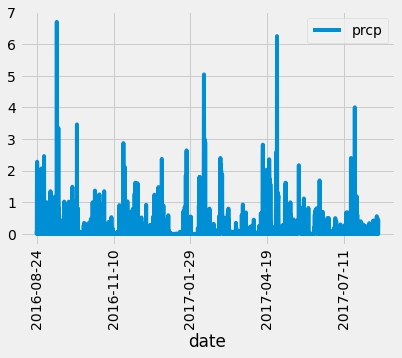

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
#This plot only seems to function if I do NOT set_index as 'date' as requested by the instructions

ax = sorted_year.plot(x='date', y='prcp', rot=90)

plt.show()


In [31]:
#Summary statistics

latest_year_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [35]:
stations = session.query(Station.station)

for each in stations:
    print(each.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

station_counts = measurement_df['station'].value_counts()
station_counts.sort_values(ascending=False)

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [37]:
results = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc())

for row in results:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [38]:
print(results.first())

('USC00519281', 2772)


In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281')

for x in low_temp:
    print(f'Minimum Temperature for station USC00519281: {x}')


Minimum Temperature for station USC00519281: (54.0,)


In [40]:
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281')

for x in max_temp:
    print(f'Maximum Temperature for station USC00519281: {x}')

Maximum Temperature for station USC00519281: (85.0,)


In [41]:
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')

for x in avg_temp:
    print(f'Average Temperature for station USC00519281: {x}')

Average Temperature for station USC00519281: (71.66378066378067,)


In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_latest_year = session.query(Measurement).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago)

for row in tobs_latest_year:
    print(row.tobs)

77.0
80.0
80.0
75.0
73.0
78.0
77.0
78.0
80.0
80.0
78.0
78.0
78.0
73.0
74.0
80.0
79.0
77.0
80.0
76.0
79.0
75.0
79.0
78.0
79.0
78.0
78.0
76.0
74.0
77.0
78.0
79.0
79.0
77.0
80.0
78.0
78.0
78.0
77.0
79.0
79.0
79.0
79.0
75.0
76.0
73.0
72.0
71.0
77.0
79.0
78.0
79.0
77.0
79.0
77.0
78.0
78.0
78.0
78.0
77.0
74.0
75.0
76.0
73.0
76.0
74.0
77.0
76.0
76.0
74.0
75.0
75.0
75.0
75.0
71.0
63.0
70.0
68.0
67.0
77.0
74.0
77.0
76.0
76.0
75.0
76.0
75.0
73.0
75.0
73.0
75.0
74.0
75.0
74.0
75.0
73.0
75.0
73.0
73.0
74.0
70.0
72.0
70.0
67.0
67.0
69.0
70.0
68.0
69.0
69.0
66.0
65.0
68.0
62.0
75.0
70.0
69.0
76.0
76.0
74.0
73.0
71.0
74.0
74.0
72.0
71.0
72.0
74.0
69.0
67.0
72.0
70.0
64.0
63.0
63.0
62.0
70.0
70.0
62.0
62.0
63.0
65.0
69.0
77.0
70.0
74.0
69.0
72.0
71.0
69.0
71.0
71.0
72.0
72.0
69.0
70.0
66.0
65.0
69.0
68.0
68.0
68.0
59.0
60.0
70.0
73.0
75.0
64.0
59.0
59.0
62.0
68.0
70.0
73.0
79.0
75.0
65.0
70.0
74.0
70.0
70.0
71.0
71.0
71.0
69.0
61.0
67.0
65.0
72.0
71.0
73.0
72.0
77.0
73.0
67.0
62.0
64.0
67.0
66.0
81.0


In [43]:
tobs_latest_year9281_df = pd.read_sql_query(
    sql = tobs_latest_year.statement,
    con = engine,
)
tobs_latest_year9281_df

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0
...,...,...,...,...,...
346,14955,USC00519281,2017-08-14,0.00,77.0
347,14956,USC00519281,2017-08-15,0.32,77.0
348,14957,USC00519281,2017-08-16,0.12,76.0
349,14958,USC00519281,2017-08-17,0.01,76.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234F0060FC8>]],
      dtype=object)

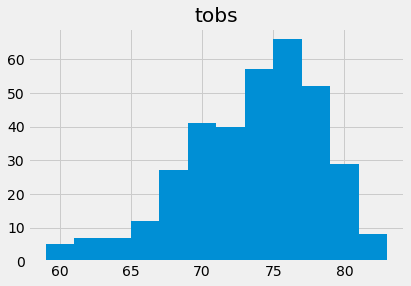

In [44]:
tobs_latest_year9281_df.hist(column='tobs',bins=12)

# Close session

In [ ]:
# Close Session
session.close()